#### Useful links

- https://fhir.epic.com/Documentation?docId=oauth2&section=BackendOAuth2Guide
- https://stackoverflow.com/questions/67558827/fhir-epic-sandbox-using-a-jwt-to-obtain-an-access-token-for-a-backend-service

#### Install PYTHON dependencies

In [ ]:
! pip install fhirpy Authlib ;

In [2]:
import datetime
import json
import os
import uuid

import requests
from authlib.jose import jwt

from fhirpy import SyncFHIRClient

#### Generate JWT and get access token

In [3]:
BASE_URL = "https://fhir.epic.com/interconnect-fhir-oauth"

In [4]:
# Token expiration time should not be more then 5 minutes since the current
exp = int((datetime.datetime.now() + datetime.timedelta(minutes=4)).timestamp())

# https://fhir.epic.com/Documentation?docId=oauth2&section=Creating-JWTs
jwt_header = {"alg": "RS384", "typ": "JWT"}
payload = {
    "iss": "", # non-production ID, see screnshort below
    "sub": "", # non-production ID, see screnshort below
    "aud": f"{BASE_URL}/oauth2/token",
    "jti": str(uuid.uuid4()), # should be uniq for every token request within the exp 
    "exp": exp,
}

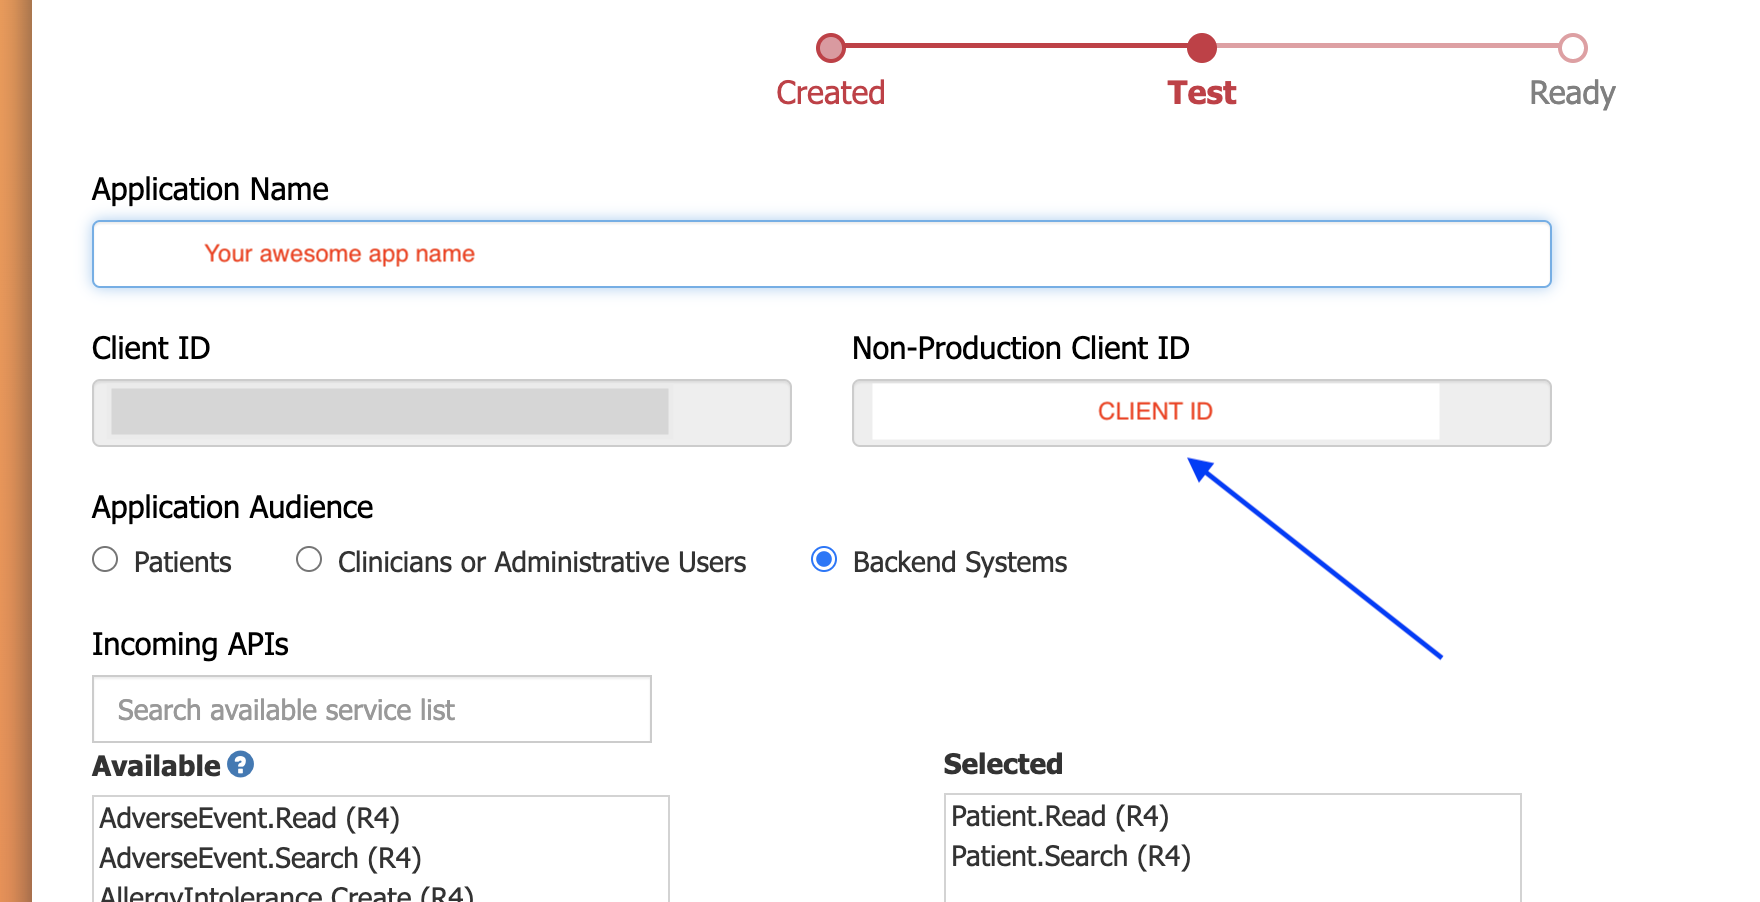

In [5]:
from IPython.display import Image

Image(filename="example/non-production-client-id.png", width=400, height=200)

In [6]:
# https://fhir.epic.com/Documentation?docId=oauth2&section=Creating-Key-Pair_OpenSSL
with open("") as f: # path to generated private .pem file
    private_key = f.read()

In [7]:
# You can read the file with private key
# or use its content as a string variable for testing purposes
encoded_token = jwt.encode(jwt_header, payload, private_key)

In [8]:
# https://fhir.epic.com/Documentation?docId=oauth2&section=Backend-Oauth2_Access-Token-Request
data = {
    "grant_type": "client_credentials",
    "client_assertion_type": "urn:ietf:params:oauth:client-assertion-type:jwt-bearer",
    "client_assertion": encoded_token
}
headers = requests.structures.CaseInsensitiveDict(
    [("Content-Type", "application/x-www-form-urlencoded")]
)

In [9]:
response = requests.post(
    f"{BASE_URL}/oauth2/token",
    headers=headers,
    data=data,
)
print(json.dumps(response.json(), indent=4, separators=(',', ': ')))

{
    "access_token": "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJhdWQiOiJ1cm46b2lkOmZoaXIiLCJjbGllbnRfaWQiOiI4NmE2NjIwMy1hNGZjLTQxYjctYmY0MS05ODU4YjhlYzY2NTgiLCJlcGljLmVjaSI6InVybjplcGljOk9wZW4uRXBpYy1jdXJyZW50IiwiZXBpYy5tZXRhZGF0YSI6IlloUDY5YmlleExEa3hEa3UwSVRJWkdSanFVdUQwbExhdXotNW9saDZQLUNSeG52RTJ1dHBjVHZyRkp1VVlTSkdYNEdXZmZ3QmpMUGlHWjIxM3ZuWmV0ZF9hdDNQNGNaOFRVYTJQS1JXTDR5UFIxcXZYUXpqU1lxQzFHd3F4WmJDIiwiZXBpYy50b2tlbnR5cGUiOiJhY2Nlc3MiLCJleHAiOjE2NzE2OTc5NTEsImlhdCI6MTY3MTY5NDM1MSwiaXNzIjoidXJuOm9pZDpmaGlyIiwianRpIjoiZWUyMjQzZmItZGVmNS00YmUzLWFhZDctMTVkMDM3M2M4YzE3IiwibmJmIjoxNjcxNjk0MzUxLCJzdWIiOiJldk5wLUtoWXdPT3FBWm4xcFoyZW51QTMifQ.Sum7vcHX-2uUlRZE5HYmskT6u6gCd5z2ENmgs8jX9uMk-yfCDqtvAOyErV0MQZrkhrX3BF6WHTS5e9SasouES6OPYtlNe833slQJmsz_LMicu4orTGc0FvcvQTWlRj-Aa7IIyPYdNB2A3wIkRQP8fGscM-_PCCVLbLBasMGFDXgm4uzzsvPkshmnb9cNyX1XAq77jc5vcoEvBQqPzGST6dO6YVHQ-U6D7kMogcH-SerTM3weU3T1QWAa2WIKMAmlBYeyDuBf2bT75h4LFJC34kh2_FUpSpys7dsu7oLtvOI6nMUn8qQ1zBDvD2_FoHzx2MrYA49Yz7jl4iCuysb4TA",
    "token_t

In [10]:
access_token = response.json()["access_token"]

#### Init FHIR Client

In [11]:
FHIR_BASE_URL = f"{BASE_URL}/api/FHIR/R4"

In [12]:
client = SyncFHIRClient(
    FHIR_BASE_URL,
    authorization=f"Bearer {access_token}",
)
client

<SyncFHIRClient https://fhir.epic.com/interconnect-fhir-oauth/api/FHIR/R4>

### Get patient

In [13]:
# https://fhir.epic.com/Sandbox?api=931
patient = client.reference("Patient", "eJzlzKe3KPzAV5TtkxmNivQ3").to_resource().serialize()

print(json.dumps(patient, indent=2, separators=(',', ': ')))

{
  "resourceType": "Patient",
  "id": "eJzlzKe3KPzAV5TtkxmNivQ3",
  "extension": [
    {
      "extension": [
        {
          "valueCoding": {
            "system": "http://terminology.hl7.org/CodeSystem/v3-NullFlavor",
            "code": "UNK",
            "display": "Unknown"
          },
          "url": "ombCategory"
        },
        {
          "valueString": "Unknown",
          "url": "text"
        }
      ],
      "url": "http://hl7.org/fhir/us/core/StructureDefinition/us-core-race"
    },
    {
      "extension": [
        {
          "valueString": "Unknown",
          "url": "text"
        }
      ],
      "url": "http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity"
    },
    {
      "valueCodeableConcept": {
        "coding": [
          {
            "system": "urn:oid:1.2.840.114350.1.13.0.1.7.10.698084.130.657370.19999000",
            "code": "female",
            "display": "female"
          }
        ]
      },
      "url": "http://open.epic.c